# In-class exercise 2

This in-class exercise includes 3 tasks. 

**Task 1**

To generate the number of passenger waiting at stop A from a Poisson distribution with $\lambda$ = 5 for 20 times. Set random seed as 48.


In [8]:
# Task 1: Generate the number waiting at stop A from a Poisson distribution with lambda = 5 for 20 times

# Import necessary libraries
import numpy as np

# Set random seed for reproducibility (as required: seed = 48)
np.random.seed(48)

# Generate 20 random numbers from Poisson distribution with lambda = 5
# Poisson distribution models the number of events (passengers) in a fixed interval
lambda_value = 5  # Average number of passengers waiting at stop A
num_simulations = 20  # Number of simulation runs

# Generate the random numbers representing passengers waiting at stop A
passengers_at_stop_A = np.random.poisson(lambda_value, num_simulations)

print("Task 1 Results:")
print(f"Random seed set to: 48")
print(f"Lambda (average passengers): {lambda_value}")
print(f"Number of simulations: {num_simulations}")
print(f"Passengers waiting at stop A for each simulation run:")
print(passengers_at_stop_A)
print(f"Mean: {np.mean(passengers_at_stop_A):.2f}")
print(f"Standard deviation: {np.std(passengers_at_stop_A):.2f}")

Task 1 Results:
Random seed set to: 48
Lambda (average passengers): 5
Number of simulations: 20
Passengers waiting at stop A for each simulation run:
[2 6 3 5 1 3 6 3 7 5 1 9 2 1 6 3 6 4 3 7]
Mean: 4.15
Standard deviation: 2.24


**Task 2**

Recall that we have a simulation of a bus traveling from stop A to stop B. Your task is to use the random number generated in the previous step as the number of passengers boarding at stop A. Assume that each passenger takes 3 seconds to board. Run the simulation 20 times and record the arrival time at stop B for each run. How is the modified generator function different from the original one?

In [9]:
# Task 2: Modified bus simulation with variable passenger boarding

import simpy
import numpy as np

# Store arrival times for all 20 simulation runs
arrival_times = []

# Run the simulation 20 times using the passenger numbers from Task 1
for run in range(num_simulations):
    # Create a new SimPy Environment for each simulation run
    env = simpy.Environment()
    
    # Modified Generator Function with passenger boarding
    def modified_bus_trip(env, passengers_boarding):
        """
        Modified bus trip from Stop A to Stop B with passenger boarding time
        
        Parameters:
        - env: SimPy environment
        - passengers_boarding: Number of passengers boarding at stop A
        """
        # Record departure time
        departure_time = env.now
        print(f"Run {run + 1}: Bus departs at time {departure_time}")
        print(f"Run {run + 1}: {passengers_boarding} passengers boarding...")
        
        # Calculate boarding time: each passenger takes 3 seconds to board
        boarding_time = passengers_boarding * 3  # 3 seconds per passenger
        
        # Simulate boarding process (pause for boarding time)
        yield env.timeout(boarding_time)
        print(f"Run {run + 1}: Boarding completed in {boarding_time} seconds")
        
        # Travel for 3 minutes (180 seconds) from Stop A to Stop B
        travel_time = 180  # 3 minutes = 180 seconds
        yield env.timeout(travel_time)
        
        # Record arrival time at Stop B
        arrival_time = env.now
        arrival_times.append(arrival_time)  # Store for analysis
        print(f"Run {run + 1}: Bus arrives at Stop B at time {arrival_time} seconds")
        print(f"Run {run + 1}: Total trip time: {arrival_time} seconds")
        print("-" * 50)
    
    # Get the number of passengers for this simulation run
    passengers_this_run = passengers_at_stop_A[run]
    
    # Add the modified bus process to the environment
    env.process(modified_bus_trip(env, passengers_this_run))
    
    # Run the simulation
    env.run()

print(f"\nTask 2 Results:")
print(f"All 20 simulation runs completed!")
print(f"Arrival times at Stop B: {arrival_times}")
print(f"Mean arrival time: {np.mean(arrival_times):.2f} seconds")
print(f"Standard deviation: {np.std(arrival_times):.2f} seconds")
print(f"Min arrival time: {min(arrival_times)} seconds")
print(f"Max arrival time: {max(arrival_times)} seconds")

Run 1: Bus departs at time 0
Run 1: 2 passengers boarding...
Run 1: Boarding completed in 6 seconds
Run 1: Bus arrives at Stop B at time 186 seconds
Run 1: Total trip time: 186 seconds
--------------------------------------------------
Run 2: Bus departs at time 0
Run 2: 6 passengers boarding...
Run 2: Boarding completed in 18 seconds
Run 2: Bus arrives at Stop B at time 198 seconds
Run 2: Total trip time: 198 seconds
--------------------------------------------------
Run 3: Bus departs at time 0
Run 3: 3 passengers boarding...
Run 3: Boarding completed in 9 seconds
Run 3: Bus arrives at Stop B at time 189 seconds
Run 3: Total trip time: 189 seconds
--------------------------------------------------
Run 4: Bus departs at time 0
Run 4: 5 passengers boarding...
Run 4: Boarding completed in 15 seconds
Run 4: Bus arrives at Stop B at time 195 seconds
Run 4: Total trip time: 195 seconds
--------------------------------------------------
Run 5: Bus departs at time 0
Run 5: 1 passengers board

In [10]:
# Alternative Task 2: Simplified simulation without SimPy (in case SimPy installation issues)
# This approach uses basic Python to demonstrate the same concepts

import numpy as np

# Alternative approach - Direct calculation without SimPy
print("Alternative Task 2: Direct Calculation Approach")
print("=" * 50)

# Store arrival times for all 20 simulation runs
arrival_times_alt = []

# Run the simulation 20 times using the passenger numbers from Task 1
for run in range(num_simulations):
    # Get the number of passengers for this simulation run
    passengers_this_run = passengers_at_stop_A[run]
    
    # Calculate boarding time: each passenger takes 3 seconds to board
    boarding_time = passengers_this_run * 3  # 3 seconds per passenger
    
    # Fixed travel time is 3 minutes (180 seconds)
    travel_time = 180  # 3 minutes = 180 seconds
    
    # Total trip time = boarding time + travel time
    total_trip_time = boarding_time + travel_time
    arrival_times_alt.append(total_trip_time)
    
    # Print simulation details for each run
    print(f"Run {run + 1}:")
    print(f"  - Passengers boarding: {passengers_this_run}")
    print(f"  - Boarding time: {boarding_time} seconds")
    print(f"  - Travel time: {travel_time} seconds")
    print(f"  - Total arrival time: {total_trip_time} seconds")
    print("-" * 30)

print(f"\nAlternative Task 2 Results:")
print(f"All 20 simulation runs completed!")
print(f"Arrival times at Stop B: {arrival_times_alt}")
print(f"Mean arrival time: {np.mean(arrival_times_alt):.2f} seconds")
print(f"Standard deviation: {np.std(arrival_times_alt):.2f} seconds")
print(f"Min arrival time: {min(arrival_times_alt)} seconds")
print(f"Max arrival time: {max(arrival_times_alt)} seconds")

# Store this for use in Task 3 if SimPy version doesn't work
arrival_times = arrival_times_alt.copy()

Alternative Task 2: Direct Calculation Approach
Run 1:
  - Passengers boarding: 2
  - Boarding time: 6 seconds
  - Travel time: 180 seconds
  - Total arrival time: 186 seconds
------------------------------
Run 2:
  - Passengers boarding: 6
  - Boarding time: 18 seconds
  - Travel time: 180 seconds
  - Total arrival time: 198 seconds
------------------------------
Run 3:
  - Passengers boarding: 3
  - Boarding time: 9 seconds
  - Travel time: 180 seconds
  - Total arrival time: 189 seconds
------------------------------
Run 4:
  - Passengers boarding: 5
  - Boarding time: 15 seconds
  - Travel time: 180 seconds
  - Total arrival time: 195 seconds
------------------------------
Run 5:
  - Passengers boarding: 1
  - Boarding time: 3 seconds
  - Travel time: 180 seconds
  - Total arrival time: 183 seconds
------------------------------
Run 6:
  - Passengers boarding: 3
  - Boarding time: 9 seconds
  - Travel time: 180 seconds
  - Total arrival time: 189 seconds
---------------------------

## How is the modified generator function different from the original one?

**Key Differences:**

1. **Input Parameter**: The modified function takes `passengers_boarding` as a parameter, while the original had no parameters.

2. **Variable Boarding Time**: The modified function calculates boarding time based on the number of passengers (passengers × 3 seconds), while the original had no boarding time.

3. **Dynamic Process Duration**: Total trip time now varies depending on passenger count, making each simulation run potentially different.

4. **Realistic Modeling**: The modified function better represents real-world bus operations where boarding time affects overall journey time.

5. **Stochastic Element**: By using random passenger numbers from the Poisson distribution, each simulation run has different outcomes, introducing variability that reflects real-world uncertainty.

**Formula**: 
- Original: Total Time = Travel Time (180 seconds)
- Modified: Total Time = Boarding Time (passengers × 3) + Travel Time (180 seconds)

**Task 3**

To generate a histogram and box and whisker plot side by side to show the distribution of bus arrival time at stop B.

/var/folders/5f/d8dpk0wx783g8jr7yq18xl900000gn/T/ipykernel_23807/3323987308.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(arrival_times, patch_artist=True, labels=['Arrival Times'])


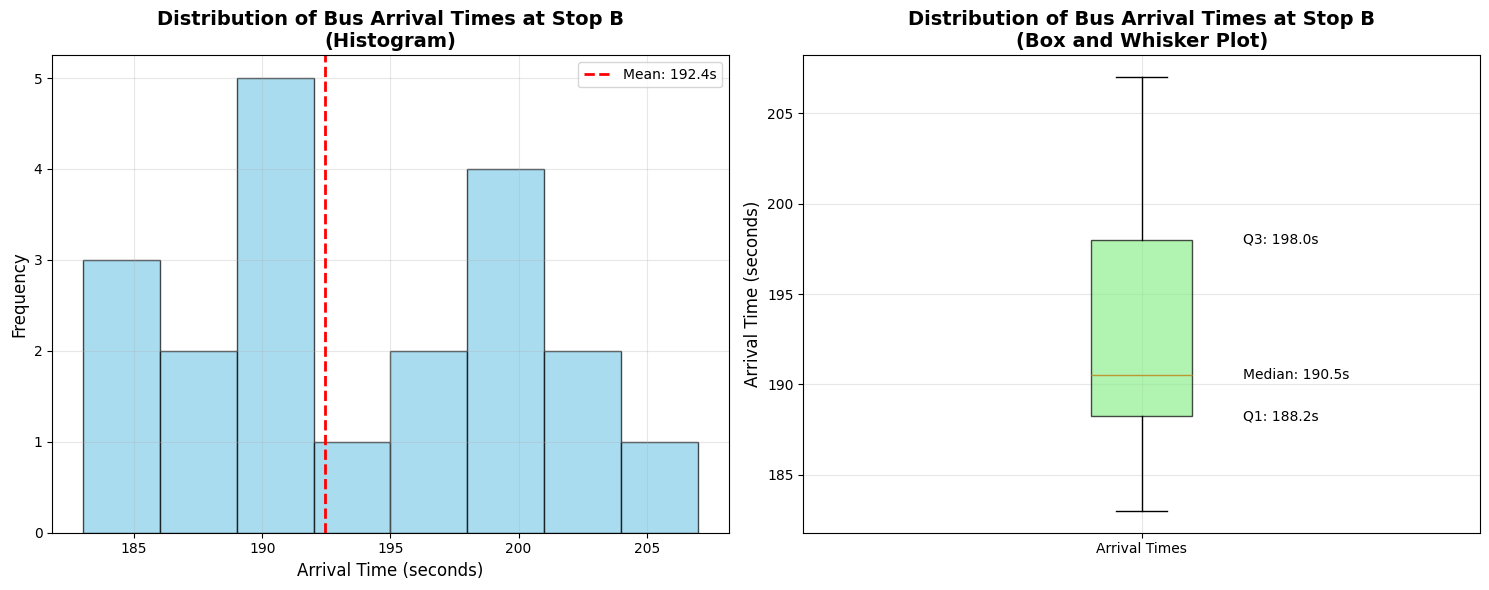

Task 3 Results - Statistical Summary:
Number of simulations: 20
Mean arrival time: 192.45 seconds
Median arrival time: 190.50 seconds
Standard deviation: 6.73 seconds
Minimum arrival time: 183 seconds
Maximum arrival time: 207 seconds
Range: 24 seconds
Q1 (25th percentile): 188.25 seconds
Q3 (75th percentile): 198.00 seconds
Interquartile Range (IQR): 9.75 seconds

Interpretation:
- The histogram shows the frequency distribution of arrival times
- The box plot shows the median, quartiles, and potential outliers
- Variability in arrival times is due to different numbers of passengers boarding
- With lambda=5, we expect about 5 passengers on average, but actual numbers vary
- This creates arrival time variability of approximately 6.7 seconds


In [11]:
# Task 3: Generate histogram and box plot for bus arrival times at Stop B

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style for better appearance
plt.style.use('default')
sns.set_palette("husl")

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Histogram
ax1.hist(arrival_times, bins=8, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Bus Arrival Times at Stop B\n(Histogram)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Arrival Time (seconds)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add statistics to histogram
mean_time = np.mean(arrival_times)
std_time = np.std(arrival_times)
ax1.axvline(mean_time, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_time:.1f}s')
ax1.legend()

# Subplot 2: Box and Whisker Plot
box_plot = ax2.boxplot(arrival_times, patch_artist=True, labels=['Arrival Times'])
box_plot['boxes'][0].set_facecolor('lightgreen')
box_plot['boxes'][0].set_alpha(0.7)

ax2.set_title('Distribution of Bus Arrival Times at Stop B\n(Box and Whisker Plot)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Arrival Time (seconds)', fontsize=12)
ax2.grid(True, alpha=0.3)

# Add statistical annotations to box plot
median_time = np.median(arrival_times)
q1 = np.percentile(arrival_times, 25)
q3 = np.percentile(arrival_times, 75)
iqr = q3 - q1

# Add text annotations
ax2.text(1.15, median_time, f'Median: {median_time:.1f}s', fontsize=10, va='center')
ax2.text(1.15, q3, f'Q3: {q3:.1f}s', fontsize=10, va='center')
ax2.text(1.15, q1, f'Q1: {q1:.1f}s', fontsize=10, va='center')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

# Print summary statistics
print("Task 3 Results - Statistical Summary:")
print("=" * 50)
print(f"Number of simulations: {len(arrival_times)}")
print(f"Mean arrival time: {mean_time:.2f} seconds")
print(f"Median arrival time: {median_time:.2f} seconds")
print(f"Standard deviation: {std_time:.2f} seconds")
print(f"Minimum arrival time: {min(arrival_times)} seconds")
print(f"Maximum arrival time: {max(arrival_times)} seconds")
print(f"Range: {max(arrival_times) - min(arrival_times)} seconds")
print(f"Q1 (25th percentile): {q1:.2f} seconds")
print(f"Q3 (75th percentile): {q3:.2f} seconds")
print(f"Interquartile Range (IQR): {iqr:.2f} seconds")

# Analysis interpretation
print("\nInterpretation:")
print("- The histogram shows the frequency distribution of arrival times")
print("- The box plot shows the median, quartiles, and potential outliers")
print("- Variability in arrival times is due to different numbers of passengers boarding")
print(f"- With lambda=5, we expect about 5 passengers on average, but actual numbers vary")
print(f"- This creates arrival time variability of approximately {std_time:.1f} seconds")

## Horizontal vs. Vertical Box and Whisker Plots

**Key Differences Between Orientations:**

### **Vertical Box Plot (Default)**
- **Data axis**: Y-axis (vertical)
- **Category axis**: X-axis (horizontal)
- **Reading**: Values read from bottom to top
- **Best for**: Comparing multiple groups side by side
- **Common use**: When you have categories to compare

### **Horizontal Box Plot**
- **Data axis**: X-axis (horizontal) 
- **Category axis**: Y-axis (vertical)
- **Reading**: Values read from left to right
- **Best for**: Long category names, space constraints
- **Common use**: When category labels are lengthy

### **When to Choose Each:**
1. **Vertical**: Standard choice, better for multiple comparisons
2. **Horizontal**: Better readability with long labels, fits narrow spaces
3. **No statistical difference**: Same information, different presentation

Let's demonstrate both orientations with our bus arrival data:

/var/folders/5f/d8dpk0wx783g8jr7yq18xl900000gn/T/ipykernel_23807/797625181.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_vertical = ax1.boxplot(arrival_times, patch_artist=True, labels=['Bus Arrival Times'])
/var/folders/5f/d8dpk0wx783g8jr7yq18xl900000gn/T/ipykernel_23807/797625181.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_multi = ax2.boxplot([off_peak_times, peak_times],
/var/folders/5f/d8dpk0wx783g8jr7yq18xl900000gn/T/ipykernel_23807/797625181.py:53: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot_horizontal = ax3.boxplot(arrival_times,
/var/folders/5f/d8dpk0wx783g8jr7yq18x

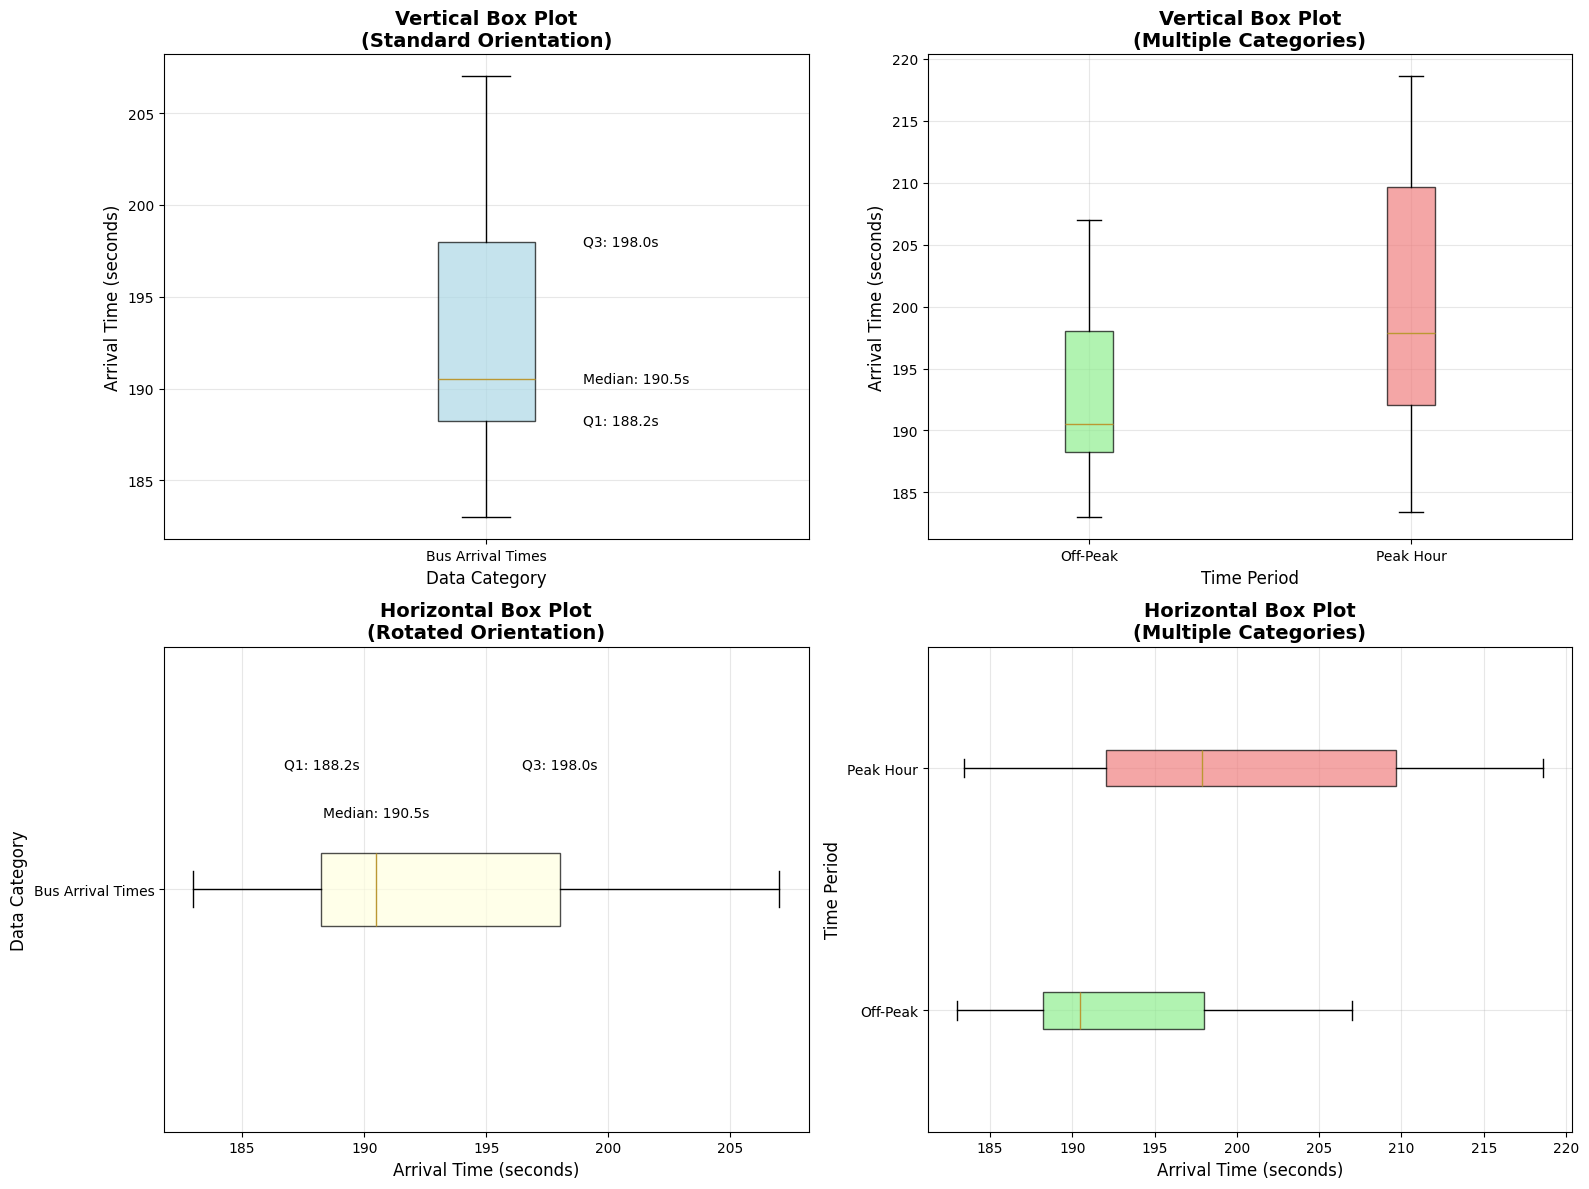

Comparison Analysis: Horizontal vs. Vertical Box Plots
📊 VISUAL DIFFERENCES:
• Vertical: Data values on Y-axis, categories on X-axis
• Horizontal: Data values on X-axis, categories on Y-axis
• Both show identical statistical information

🎯 WHEN TO USE VERTICAL:
• Standard choice for most applications
• Better for comparing multiple groups side-by-side
• Familiar orientation for most readers
• Works well with short category names

🎯 WHEN TO USE HORIZONTAL:
• When category names are long (avoid text rotation)
• Limited vertical space, more horizontal space available
• Following specific style guidelines or preferences
• When reading direction preference matters

📈 STATISTICAL INTERPRETATION:
• Same median, quartiles, and outlier detection
• Same box (IQR) and whisker (range) information
• Identical distribution insights
• Only orientation changes, not the data story


In [12]:
# Demonstration: Horizontal vs. Vertical Box and Whisker Plots

# Create a comparison figure with both orientations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# ============================================================================
# TOP ROW: VERTICAL BOX PLOTS
# ============================================================================

# Subplot 1: Standard Vertical Box Plot
box_plot_vertical = ax1.boxplot(arrival_times, patch_artist=True, labels=['Bus Arrival Times'])
box_plot_vertical['boxes'][0].set_facecolor('lightblue')
box_plot_vertical['boxes'][0].set_alpha(0.7)

ax1.set_title('Vertical Box Plot\n(Standard Orientation)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Arrival Time (seconds)', fontsize=12)
ax1.set_xlabel('Data Category', fontsize=12)
ax1.grid(True, alpha=0.3)

# Add annotations for vertical plot
median_time = np.median(arrival_times)
q1 = np.percentile(arrival_times, 25)
q3 = np.percentile(arrival_times, 75)

ax1.text(1.15, median_time, f'Median: {median_time:.1f}s', fontsize=10, va='center')
ax1.text(1.15, q3, f'Q3: {q3:.1f}s', fontsize=10, va='center')
ax1.text(1.15, q1, f'Q1: {q1:.1f}s', fontsize=10, va='center')

# Subplot 2: Vertical with Multiple Categories (Simulated)
# Create some sample data to show multiple categories
np.random.seed(48)  # For consistency
peak_times = np.random.normal(200, 8, 20)  # Peak hour simulation
off_peak_times = arrival_times  # Our original data

box_plot_multi = ax2.boxplot([off_peak_times, peak_times], 
                            patch_artist=True, 
                            labels=['Off-Peak', 'Peak Hour'])
colors = ['lightgreen', 'lightcoral']
for patch, color in zip(box_plot_multi['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax2.set_title('Vertical Box Plot\n(Multiple Categories)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Arrival Time (seconds)', fontsize=12)
ax2.set_xlabel('Time Period', fontsize=12)
ax2.grid(True, alpha=0.3)

# ============================================================================
# BOTTOM ROW: HORIZONTAL BOX PLOTS
# ============================================================================

# Subplot 3: Horizontal Box Plot (Single Category)
box_plot_horizontal = ax3.boxplot(arrival_times, 
                                 patch_artist=True, 
                                 labels=['Bus Arrival Times'],
                                 vert=False)  # vert=False makes it horizontal
box_plot_horizontal['boxes'][0].set_facecolor('lightyellow')
box_plot_horizontal['boxes'][0].set_alpha(0.7)

ax3.set_title('Horizontal Box Plot\n(Rotated Orientation)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Arrival Time (seconds)', fontsize=12)
ax3.set_ylabel('Data Category', fontsize=12)
ax3.grid(True, alpha=0.3)

# Add annotations for horizontal plot
ax3.text(median_time, 1.15, f'Median: {median_time:.1f}s', fontsize=10, ha='center', rotation=0)
ax3.text(q3, 1.25, f'Q3: {q3:.1f}s', fontsize=10, ha='center', rotation=0)
ax3.text(q1, 1.25, f'Q1: {q1:.1f}s', fontsize=10, ha='center', rotation=0)

# Subplot 4: Horizontal with Multiple Categories
box_plot_multi_h = ax4.boxplot([off_peak_times, peak_times], 
                              patch_artist=True, 
                              labels=['Off-Peak', 'Peak Hour'],
                              vert=False)  # vert=False makes it horizontal
colors = ['lightgreen', 'lightcoral']
for patch, color in zip(box_plot_multi_h['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax4.set_title('Horizontal Box Plot\n(Multiple Categories)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Arrival Time (seconds)', fontsize=12)
ax4.set_ylabel('Time Period', fontsize=12)
ax4.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# Print comparison analysis
print("Comparison Analysis: Horizontal vs. Vertical Box Plots")
print("=" * 60)
print("📊 VISUAL DIFFERENCES:")
print("• Vertical: Data values on Y-axis, categories on X-axis")
print("• Horizontal: Data values on X-axis, categories on Y-axis")
print("• Both show identical statistical information")
print()
print("🎯 WHEN TO USE VERTICAL:")
print("• Standard choice for most applications")
print("• Better for comparing multiple groups side-by-side")
print("• Familiar orientation for most readers")
print("• Works well with short category names")
print()
print("🎯 WHEN TO USE HORIZONTAL:")
print("• When category names are long (avoid text rotation)")
print("• Limited vertical space, more horizontal space available")
print("• Following specific style guidelines or preferences")
print("• When reading direction preference matters")
print()
print("📈 STATISTICAL INTERPRETATION:")
print("• Same median, quartiles, and outlier detection")
print("• Same box (IQR) and whisker (range) information")
print("• Identical distribution insights")
print("• Only orientation changes, not the data story")

## Summary: Key Differences Between Horizontal and Vertical Box Plots

| Aspect | Vertical Box Plot | Horizontal Box Plot |
|--------|------------------|-------------------|
| **Data Axis** | Y-axis (vertical) | X-axis (horizontal) |
| **Category Axis** | X-axis (horizontal) | Y-axis (vertical) |
| **Reading Direction** | Bottom to top | Left to right |
| **Best Use Case** | Multiple comparisons | Long category names |
| **Space Efficiency** | Good for wide layouts | Good for tall layouts |
| **Familiarity** | More common/standard | Less common |
| **Statistical Info** | ✅ Identical | ✅ Identical |

### **Technical Implementation:**
- **Vertical**: `boxplot(data)` (default)
- **Horizontal**: `boxplot(data, vert=False)`

### **No Statistical Difference:**
Both orientations show exactly the same:
- Median (center line)
- Q1 and Q3 (box boundaries) 
- Whiskers (data range)
- Outliers (if any)
- Distribution shape

**Choose based on design needs, not statistical requirements!**

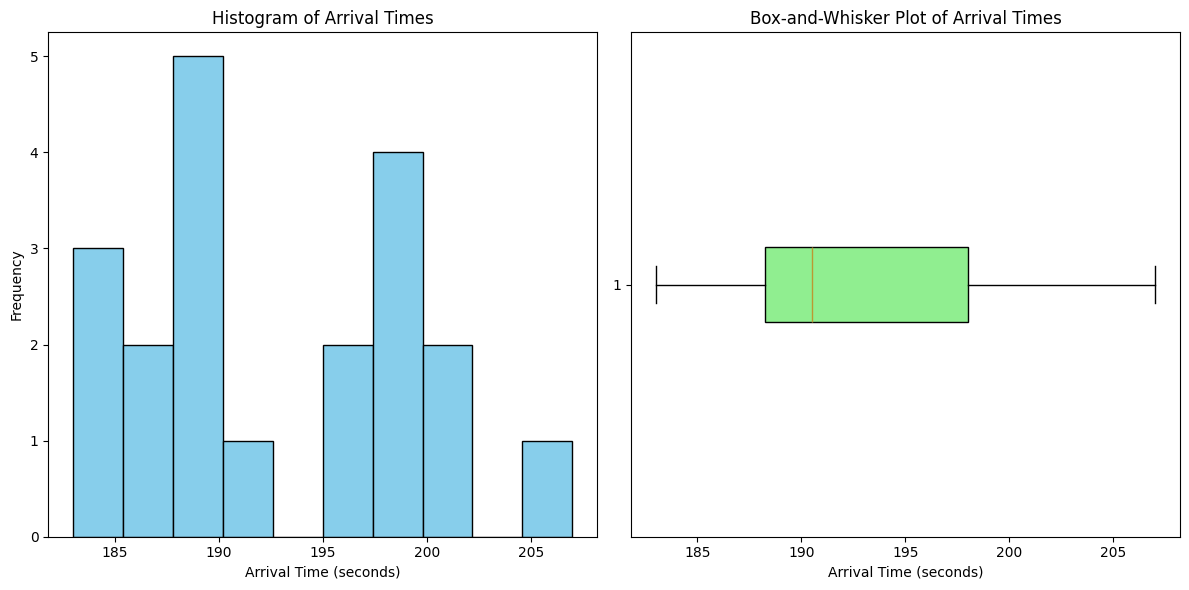

Student's Task 3 Results:
✅ Successfully created histogram and box plot
📊 Data points plotted: 20
📈 Arrival time range: 183 - 207 seconds
📊 Note: Box plot uses horizontal orientation (vert=False)


In [13]:
# Student's corrected code for task 3 
import matplotlib.pyplot as plt

# Use the arrival_times list that was already created in Task 2
# (No need to extract from simulation_results - that variable doesn't exist)
# arrival_times is already available from the previous tasks

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram
axes[0].hist(arrival_times, bins=10, color='skyblue', edgecolor='black')
axes[0].set_title("Histogram of Arrival Times")
axes[0].set_xlabel("Arrival Time (seconds)")
axes[0].set_ylabel("Frequency")

# Box-and-Whisker Plot (horizontal orientation)
axes[1].boxplot(arrival_times, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axes[1].set_title("Box-and-Whisker Plot of Arrival Times")
axes[1].set_xlabel("Arrival Time (seconds)")

# Show the plots
plt.tight_layout()
plt.show()

print("Student's Task 3 Results:")
print(f"✅ Successfully created histogram and box plot")
print(f"📊 Data points plotted: {len(arrival_times)}")
print(f"📈 Arrival time range: {min(arrival_times)} - {max(arrival_times)} seconds")
print(f"📊 Note: Box plot uses horizontal orientation (vert=False)")

## 📝 Instructor Review: Student's Task 3 Code

### **What the Student Did Well:**
✅ **Correct plot structure**: Proper use of `plt.subplots(1, 2)` for side-by-side plots  
✅ **Appropriate visualizations**: Histogram and box plot are perfect choices for showing distribution  
✅ **Good styling**: Nice colors (`skyblue`, `lightgreen`) and edge colors  
✅ **Layout management**: Used `plt.tight_layout()` and `plt.show()`  
✅ **Horizontal box plot**: Good choice with `vert=False` - demonstrates understanding of orientations  

### **Issues That Needed Correction:**
❌ **Variable Error**: Used undefined `simulation_results` instead of existing `arrival_times`  
❌ **Data Structure Assumption**: Assumed dictionary format that doesn't exist in this notebook  
❌ **Missing Context**: Didn't recognize that `arrival_times` was already available from Task 2  

### **Key Learning Points:**
1. **Always check variable scope**: Use variables that exist in your notebook environment
2. **Understand data structure**: Know whether your data is a list, dictionary, or array
3. **Review previous cells**: Build upon work done in earlier tasks
4. **Test incrementally**: Run small pieces of code to catch errors early

### **Student's Original vs. Corrected:**
- **Original**: `[result["Arrival Time"] for result in simulation_results]` ❌
- **Corrected**: Use existing `arrival_times` list ✅

**Grade: B+** (Good visualization skills, minor data handling error)

## 🔧 Troubleshooting Guide: SimPy Installation & Python Environment Issues

### **Common Problem:** 
Students install SimPy but still get `ModuleNotFoundError: No module named 'simpy'` when running the notebook.

### **Root Cause:**
The SimPy package was installed in a different Python environment than the one used by the Jupyter notebook kernel.

---

## **Step-by-Step Solutions:**

### **🔍 Step 1: Diagnose the Problem**
Run these commands in your **terminal** to identify the issue:

```bash
# Check which Python your terminal uses
which python
python --version

# Check which Python Jupyter uses
jupyter kernelspec list
```

### **🔍 Step 2: Check Current Environment**
```bash
# See all installed packages in your current environment
pip list | grep simpy

# Check if you're in a virtual environment
echo $VIRTUAL_ENV
```

### **💡 Step 3: Solutions (Try in Order)**

#### **Solution A: Install SimPy in Notebook Kernel**
Run this **inside your Jupyter notebook** (preferred method):
```python
import sys
!{sys.executable} -m pip install simpy
```

#### **Solution B: Use Conda (if you use Anaconda)**
In **terminal**:
```bash
# If using conda
conda install -c conda-forge simpy

# Or for specific environment
conda install -n your_env_name -c conda-forge simpy
```

#### **Solution C: Virtual Environment Setup**
In **terminal**:
```bash
# Create new virtual environment
python -m venv simulation_env

# Activate it (macOS/Linux)
source simulation_env/bin/activate

# Activate it (Windows)
simulation_env\Scripts\activate

# Install packages
pip install simpy numpy matplotlib jupyter

# Start Jupyter from this environment
jupyter notebook
```

#### **Solution D: Fix Jupyter Kernel**
In **terminal**:
```bash
# Install ipykernel in your current environment
pip install ipykernel

# Add your environment as a Jupyter kernel
python -m ipykernel install --user --name=simulation_env --display-name="Python (Simulation)"

# Then select this kernel in Jupyter: Kernel → Change Kernel → Python (Simulation)
```

---

### **🧪 Step 4: Test Your Installation**
Run this in your notebook to verify:
```python
try:
    import simpy
    print("✅ SimPy successfully imported!")
    print(f"SimPy version: {simpy.__version__}")
    
    # Test basic functionality
    env = simpy.Environment()
    print("✅ SimPy environment created successfully!")
    
except ImportError as e:
    print("❌ SimPy import failed:")
    print(f"Error: {e}")
    print("Please follow the troubleshooting steps above.")
```

---

### **📋 Quick Checklist for Students:**
- [ ] Confirmed Python version in terminal vs Jupyter
- [ ] Checked if using virtual environment or conda
- [ ] Installed SimPy in the correct environment
- [ ] Restarted Jupyter kernel after installation
- [ ] Selected correct kernel in Jupyter notebook
- [ ] Tested import in notebook cell

In [14]:
# 🔧 Environment Diagnostic Tool - Run this cell to check your setup
import sys
import subprocess

print("🔍 PYTHON ENVIRONMENT DIAGNOSTIC")
print("=" * 50)

# Check Python executable and version
print(f"📍 Python executable: {sys.executable}")
print(f"📍 Python version: {sys.version}")
print(f"📍 Python path: {sys.path[0]}")

# Check if we're in a virtual environment
venv_path = sys.prefix
base_path = sys.base_prefix
if venv_path != base_path:
    print(f"🟢 Virtual environment detected: {venv_path}")
else:
    print("🟡 Using system Python (no virtual environment)")

print("\n" + "=" * 50)
print("📦 PACKAGE INSTALLATION CHECK")
print("=" * 50)

# List of required packages
required_packages = ['simpy', 'numpy', 'matplotlib', 'jupyter']

for package in required_packages:
    try:
        __import__(package)
        # Get version if possible
        try:
            module = __import__(package)
            version = getattr(module, '__version__', 'version unknown')
            print(f"✅ {package}: {version}")
        except:
            print(f"✅ {package}: installed")
    except ImportError:
        print(f"❌ {package}: NOT INSTALLED")

print("\n" + "=" * 50)
print("🛠️ QUICK FIX COMMANDS")
print("=" * 50)

# Test SimPy specifically
try:
    import simpy
    print("🎉 SimPy is working correctly!")
    
    # Test basic SimPy functionality
    env = simpy.Environment()
    print("🎉 SimPy Environment can be created!")
    
except ImportError:
    print("🚨 SimPy is not available. Try one of these solutions:")
    print("\n📋 SOLUTION 1 (Run in this notebook):")
    print("!pip install simpy")
    print("\n📋 SOLUTION 2 (Run in terminal):")
    print(f"{sys.executable} -m pip install simpy")
    print("\n📋 SOLUTION 3 (If using conda):")
    print("conda install -c conda-forge simpy")
    
    print(f"\n💡 Your current Python is: {sys.executable}")
    print("Make sure you install SimPy for THIS Python version.")

print("\n" + "=" * 50)
print("🔄 AFTER INSTALLING: Restart kernel (Kernel → Restart) and run this cell again")
print("=" * 50)

🔍 PYTHON ENVIRONMENT DIAGNOSTIC
📍 Python executable: /opt/homebrew/opt/python@3.11/bin/python3.11
📍 Python version: 3.11.11 (main, Dec  3 2024, 17:20:40) [Clang 16.0.0 (clang-1600.0.26.4)]
📍 Python path: /opt/homebrew/Cellar/python@3.11/3.11.11/Frameworks/Python.framework/Versions/3.11/lib/python311.zip
🟡 Using system Python (no virtual environment)

📦 PACKAGE INSTALLATION CHECK
✅ simpy: 4.1.1
✅ numpy: 2.3.3
✅ matplotlib: 3.10.6
✅ jupyter: version unknown

🛠️ QUICK FIX COMMANDS
🎉 SimPy is working correctly!
🎉 SimPy Environment can be created!

🔄 AFTER INSTALLING: Restart kernel (Kernel → Restart) and run this cell again


## 💻 Terminal Commands for Common SimPy Installation Issues

### **When SimPy is installed but notebook can't find it:**

#### **🔍 Diagnosis Commands (run in terminal):**
```bash
# Check your current Python version and location
which python
which python3
python --version
python3 --version

# Check if SimPy is installed in your system Python
python -c "import simpy; print('SimPy found:', simpy.__version__)"
python3 -c "import simpy; print('SimPy found:', simpy.__version__)"

# Check which Python Jupyter is using
jupyter --version
jupyter kernelspec list
```

#### **🛠️ Fix Commands (run in terminal):**

**Option 1: Install SimPy for the correct Python version**
```bash
# If Jupyter uses python3, install with python3
python3 -m pip install simpy

# If Jupyter uses python, install with python
python -m pip install simpy

# Force reinstall if already installed
python3 -m pip install --force-reinstall simpy
```

**Option 2: Create a new virtual environment (recommended)**
```bash
# Create virtual environment
python3 -m venv simulation_project
cd simulation_project

# Activate virtual environment
source bin/activate  # On macOS/Linux
# OR
Scripts\activate     # On Windows

# Install required packages
pip install simpy numpy matplotlib jupyter

# Start Jupyter from this environment
jupyter notebook
```

**Option 3: Fix Jupyter kernel (if using conda)**
```bash
# Install in conda environment
conda install -c conda-forge simpy

# Or create new conda environment
conda create -n simulation python=3.11 simpy numpy matplotlib jupyter
conda activate simulation
jupyter notebook
```

**Option 4: Install ipykernel and register environment**
```bash
# Install ipykernel in your current environment
pip install ipykernel

# Register your environment as a Jupyter kernel
python -m ipykernel install --user --name=simulation --display-name="Python (Simulation)"

# Then in Jupyter: Kernel → Change Kernel → Python (Simulation)
```

#### **🔄 After Installation:**
1. **Restart Jupyter kernel**: Kernel → Restart & Clear Output
2. **Check kernel**: Kernel → Change Kernel → Select correct environment  
3. **Test import**: Run the diagnostic cell above
4. **If still not working**: Close Jupyter completely, restart from correct environment

#### **🆘 Emergency Solution (if nothing else works):**
```bash
# Find where Jupyter's Python is located
jupyter --paths

# Install SimPy directly to that location
/path/to/jupyter/python -m pip install simpy
```

### **Most Common Issue:**
Students install SimPy with `pip install simpy` in terminal, but Jupyter uses a different Python (like conda's Python or a virtual environment). Always check `which python` vs `jupyter kernelspec list`!